In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import blended_transform_factory
import shutil
import pandas as pd
import numpy as np
import ast

In [4]:
import warnings
warnings.filterwarnings("ignore")

### Read all category csv files

In [5]:
topic_csv_dir = "topic_csv"

all_data_df = pd.read_csv(f"{topic_csv_dir}/all_results.csv")
print(f"Loaded file {topic_csv_dir}/all_results.csv with shape {all_data_df.shape}")
# convert Image column value to string
all_data_df["Image"] = all_data_df["Image"].astype(str)

# list all csv files in the directory
csv_files = [f for f in os.listdir(topic_csv_dir) if f != "all_results.csv"]
print(f"Now:, concatenating: {csv_files}")

# read all csv files and concatenate them into one dataframe
all_topic_df = pd.concat([pd.read_csv(os.path.join(topic_csv_dir, f)) for f in csv_files])
all_topic_df["Image"] = all_topic_df["Image"].astype(str)
print(f"Concatenated all csv files into one dataframe with shape {all_topic_df.shape}")

Loaded file topic_csv/all_results.csv with shape (91045, 36)
Now:, concatenating: ['K. Immigration and migration.csv', 'Q. Security.csv', 'P. Methodological research.csv', 'C. Science and technology.csv', 'N. Economy and work.csv', 'B. Religion and spirituality.csv', 'G. International affairs.csv', 'O. Regions and countries.csv', 'E. Demographics.csv', 'J. News habits and media.csv', 'A. Social values and attitudes.csv', 'D. Politics and policy.csv', 'L. Family and relationships.csv', 'M. Race and ethnicity.csv', 'I. Gender and LGBTQ.csv']
Concatenated all csv files into one dataframe with shape (91045, 36)


In [6]:
unique_questions_df = all_topic_df[all_topic_df['Image'] == 'True'][['question_topic', 'question_text', 'md_sim_topic', 'question_topic_mean_similarity','question_topic_country_mean_similarity', 'country']].drop_duplicates()
unique_questions_df = unique_questions_df.groupby(['question_topic', 'country'])
unique_questions_df.head(2)

,question_topic,question_text,md_sim_topic,question_topic_mean_similarity,question_topic_country_mean_similarity,country
447,K. Immigration and migration,"From your point of view, what have been the ef...",0.598866,0.558342,0.525311,Bangladesh
451,K. Immigration and migration,Now we would like to know your opinion about t...,0.731337,0.558342,0.525311,Bangladesh
483,K. Immigration and migration,"From your point of view, what have been the ef...",0.589006,0.558342,0.605786,Brazil
490,K. Immigration and migration,"From your point of view, what have been the ef...",0.498151,0.558342,0.605786,Brazil
525,K. Immigration and migration,"From your point of view, what have been the ef...",0.589006,0.558342,0.541541,China
...,...,...,...,...,...,...
528,I. Gender and LGBTQ,On this list are various groups of people. Cou...,0.484065,0.495360,0.587433,Spain
538,I. Gender and LGBTQ,Please tell me for each of the following state...,0.515991,0.495360,0.561818,United States
548,I. Gender and LGBTQ,On this list are various groups of people. Cou...,0.484065,0.495360,0.561818,United States
578,I. Gender and LGBTQ,Please tell me for each of the following state...,0.515991,0.495360,0.494852,Vietnam


### Plot Question Topic level similarity and JSD values for each country
- This is per country
- Note that all images are for people of same demographic group

In [7]:
all_data_df.columns

Index(['img_id', 'image_path', 'country', 'image_code', 'income',
       'question_text', 'country_prompt', 'generic_prompt', 'option_labels',
       'full_options', 'prompt', 'options', 'top10_token_prob',
       'prob_percent_sorted', 'sum_prob_percent_sorted', 'prob_percent_keys',
       'prob_percent_values', 'selection_answers', 'jsd', 'similarity',
       'Image', 'model_size', 'country_mean_jsd', 'coutry_mean_similarity',
       'question_topic', 'question_topic_mean_jsd',
       'question_topic_mean_similarity',
       'question_topic_country_mean_similarity', 'md_topic_pred',
       'md_topic_gt', 'md_all_pred', 'md_all_gt', 'md_jsd_topic',
       'md_sim_topic', 'md_jsd_overall', 'md_sim_overall'],
      dtype='object')

In [8]:

ds_rich_countries = ["United States"]
ds_medium_countries = ["Brazil", "China", "South Africa" ]
ds_poor_countries = ["Nigeria", "Bangladesh", "Pakistan"]

country_list = ds_rich_countries + ds_medium_countries + ds_poor_countries

In [9]:
print(all_data_df['Image'].unique())
print(all_topic_df['Image'].dtype)

['False' 'True']
object


Existed! Deleted plots/individual_topic directory


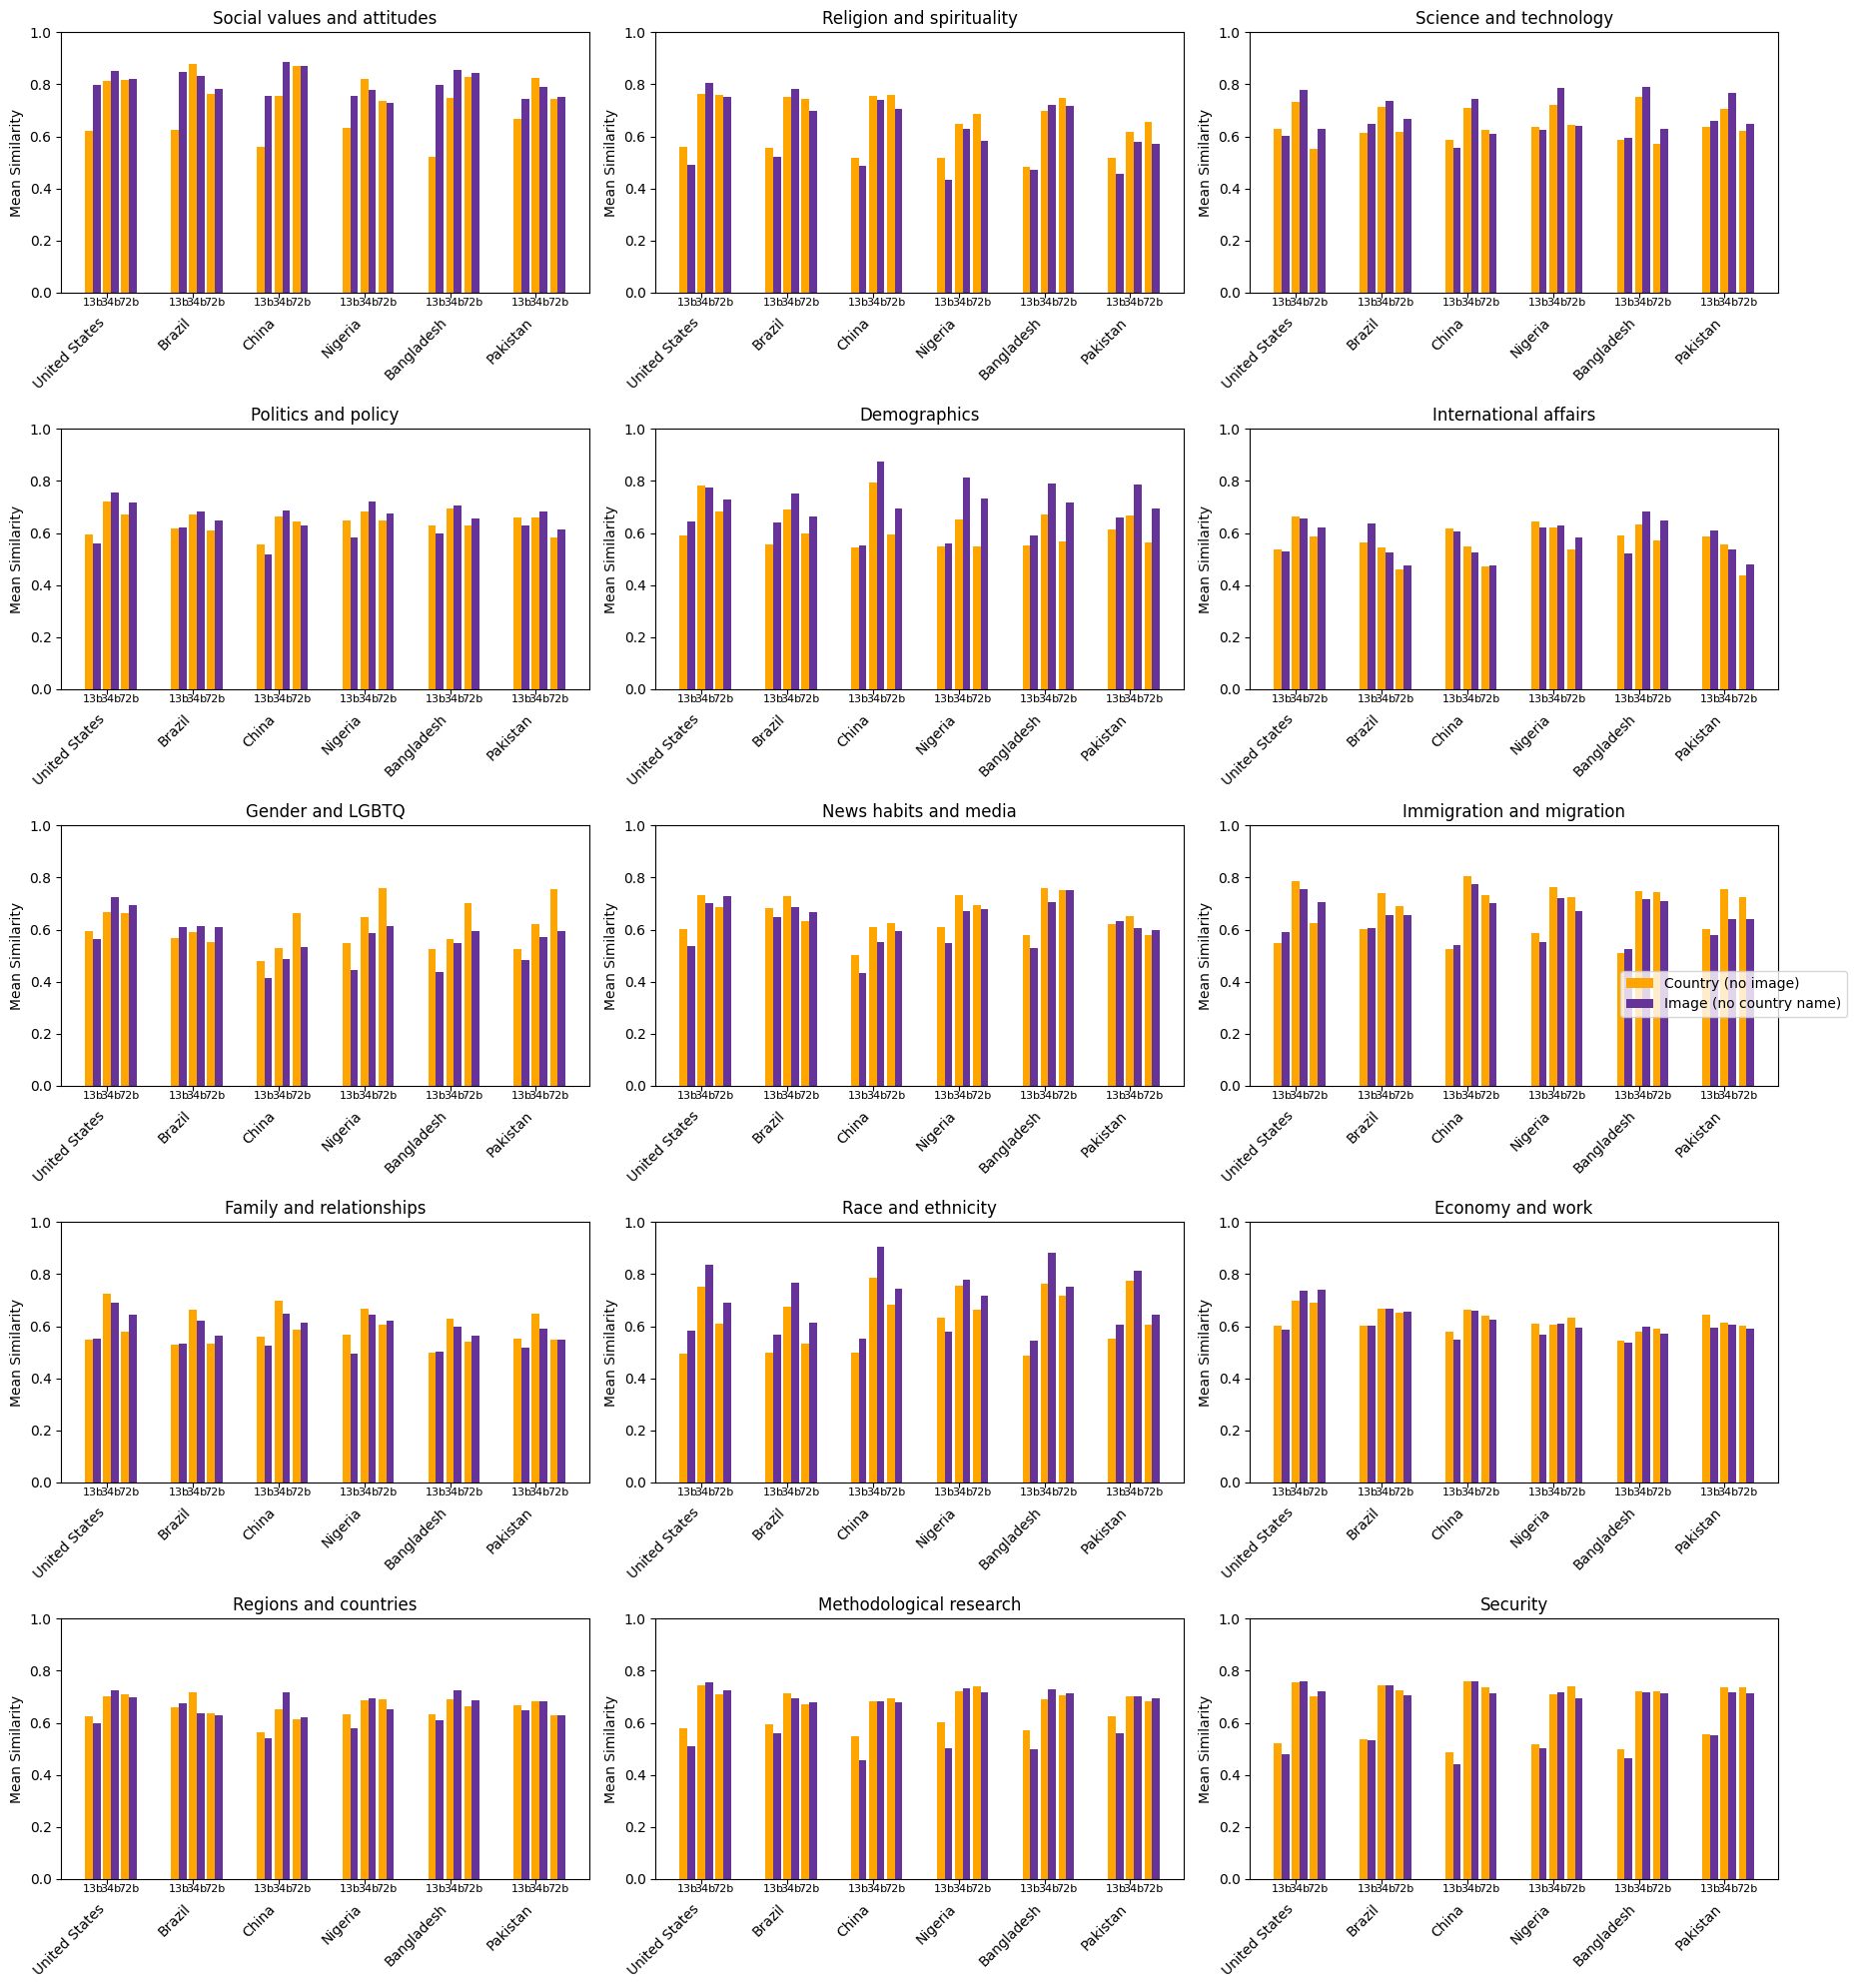

In [51]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Directory to save individual figures
individual_figures_dir = 'plots/individual_topic'
if os.path.exists(individual_figures_dir):
    shutil.rmtree(individual_figures_dir)
    print(f"Existed! Deleted {individual_figures_dir} directory")
os.makedirs(individual_figures_dir, exist_ok=True)

# List of unique question topics
question_topics = sorted(all_data_df['question_topic'].unique())

# List of unique models
models = sorted(all_data_df['model_size'].unique())

# Define the number of columns and rows for the grid layout
n_cols = 3  # Desired number of columns
n_rows = int(np.ceil(len(question_topics) / n_cols))  # Dynamically calculate the number of rows

# Define figure size based on n_cols and n_rows
fig_width = 6 * n_cols
fig_height = 4 * n_rows

# Create subplots in a grid layout
fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
axs = axs.flatten()  # Flatten the axes array for easier indexing

for idx, topic in enumerate(question_topics):
    # Filter data for the current topic
    df_category = all_data_df[all_data_df['question_topic'] == topic].copy()

    # Convert Image to boolean
    df_category.loc[:, 'Image'] = df_category['Image'].map({'False': False, 'True': True})

    # Group and calculate means
    df_mean = (
        df_category
        .groupby(['country', 'Image', 'model_size'])[['question_topic_country_mean_similarity', 'md_sim_topic']]
        .mean()
        .reset_index()
    )

    # Pivot to get columns for Image = True/False
    df_pivot = df_mean.pivot_table(
        index=['country', 'model_size'],
        columns='Image',
        values='question_topic_country_mean_similarity'
    ).reset_index()

    # Calculate Baseline Similarity (using 'md_sim_topic' from rows where Image=True)
    baseline_similarity = (
        df_mean[df_mean['Image'] == True]
        .groupby(['country', 'model_size'])['md_sim_topic']
        .mean()
        .reset_index()
        .rename(columns={'md_sim_topic': 'Baseline Similarity'})
    )

    # Merge baseline into df_pivot
    df_pivot = df_pivot.merge(baseline_similarity, on=['country', 'model_size'], how='left')

    # Drop rows without baseline
    df_pivot.dropna(subset=['Baseline Similarity'], inplace=True)

    # Rename columns for clarity
    df_pivot.rename(columns={False: 'Text Similarity', True: 'Image Similarity'}, inplace=True)

    # Ensure columns exist even if missing
    for col in ['Text Similarity', 'Image Similarity', 'Baseline Similarity']:
        if col not in df_pivot.columns:
            df_pivot[col] = np.nan

    # Sort countries if you have a predefined list
    # (Make sure country_list is defined or remove this block if not needed.)
    df_pivot['country'] = pd.Categorical(df_pivot['country'], categories=country_list, ordered=True)
    df_pivot.sort_values('country', inplace=True)

    # Create a complete grid of (country, model_size) to ensure all combos
    all_combinations = pd.MultiIndex.from_product(
        [country_list, models],
        names=['country', 'model_size']
    ).to_frame(index=False)
    df_pivot = all_combinations.merge(df_pivot, on=['country', 'model_size'], how='left')

    # Drop rows with missing data in any of the main similarity columns
    df_pivot.dropna(subset=['Text Similarity', 'Image Similarity', 'Baseline Similarity'], inplace=True)

    # Prepare for plotting
    countries = df_pivot['country'].unique()
    x = np.arange(len(countries))

    # Bar settings
    ax = axs[idx]
    n_models = len(models)
    bar_width = 0.09
    gap = 0.12  # horizontal spacing between each model's set of bars
    group_width = n_models * bar_width + (n_models - 1) * gap  # total width occupied per x-tick

    # Flags to ensure the legend entries only appear once
    has_plotted_text = False
    has_plotted_image = False

    for model_idx, model in enumerate(models):
        df_model = df_pivot[df_pivot['model_size'] == model].copy()
        # Align order with the main 'countries' for consistent x
        df_model = df_model.set_index('country').reindex(countries).reset_index()
        df_model.dropna(subset=['Text Similarity', 'Image Similarity', 'Baseline Similarity'], inplace=True)

        # Recompute x for valid rows only
        x = np.arange(len(df_model))

        # Center offset for the bars
        start_offset = -group_width / 2 + bar_width / 2
        offset = start_offset + model_idx * (bar_width + gap)

        # Plot Text Similarity
        if not has_plotted_text:
            ax.bar(x + offset, df_model['Text Similarity'], bar_width,
                   color='orange', label='Country (no image)')
            has_plotted_text = True
        else:
            ax.bar(x + offset, df_model['Text Similarity'], bar_width,
                   color='orange')

        # Plot Image Similarity right next to the Text bar
        if not has_plotted_image:
            ax.bar(x + offset + bar_width, df_model['Image Similarity'], bar_width,
                   color='rebeccapurple', label='Image (no country name)')
            has_plotted_image = True
        else:
            ax.bar(x + offset + bar_width, df_model['Image Similarity'], bar_width,
                   color='rebeccapurple')

        # Add the model name below each bar group
        for i in range(len(x)):
            center_position = x[i] + offset + bar_width / 2
            ax.text(
                center_position, -0.02, model,  # negative value -> below x-axis
                ha='center', va='top', fontsize=8, color='black',
                transform=ax.get_xaxis_transform()  # keep text in axis coords
            )

    # Title & axes settings
    topic_title = topic.split('.', 1)[-1].strip()
    ax.set_title(f'{topic_title}')
    ax.set_ylabel('Mean Similarity')
    ax.set_ylim([0, 1])

    # Set x-ticks to the center of each group
    ax.set_xticks(x)
    ax.set_xticklabels(df_model['country'].values, rotation=45, ha='right')
    # Add a vertical gap while adding x labels
    for tick in ax.get_xticklabels():
        tick.set_y(-0.05)  # Adjust this value to set the vertical gap

    # --- Save the individual plot ---
    fig_individual, ax_individual = plt.subplots(figsize=(10, 5))

    # Reset flags so we can label again in the individual plot
    has_plotted_text_indiv = False
    has_plotted_image_indiv = False

    for model_idx, model in enumerate(models):
        df_model = df_pivot[df_pivot['model_size'] == model].copy()
        df_model = df_model.set_index('country').reindex(countries).reset_index()
        df_model.dropna(subset=['Text Similarity', 'Image Similarity', 'Baseline Similarity'], inplace=True)

        x = np.arange(len(df_model))
        start_offset = -group_width / 2 + bar_width / 2
        offset = start_offset + model_idx * (bar_width + gap)

        # Plot bars
        if not has_plotted_text_indiv:
            ax_individual.bar(x + offset, df_model['Text Similarity'], bar_width,
                              color='orange', label='Country (no image)')
            has_plotted_text_indiv = True
        else:
            ax_individual.bar(x + offset, df_model['Text Similarity'], bar_width,
                              color='orange')

        if not has_plotted_image_indiv:
            ax_individual.bar(x + offset + bar_width, df_model['Image Similarity'], bar_width,
                              color='rebeccapurple', label='Image (no country name)')
            has_plotted_image_indiv = True
        else:
            ax_individual.bar(x + offset + bar_width, df_model['Image Similarity'], bar_width,
                              color='rebeccapurple')

        # Model labels under each bar
        for i in range(len(x)):
            center_position = x[i] + offset + bar_width / 2
            ax_individual.text(
                center_position, -0.02, model,
                ha='center', va='top', fontsize=6, color='black',
                transform=ax_individual.get_xaxis_transform()
            )

    ax_individual.set_xticks(x)
    ax_individual.set_xticklabels(df_model['country'].values, rotation=45, ha='right')
    ax_individual.set_ylim([0, 1])
    ax_individual.set_ylabel('Mean Similarity')
    ax_individual.set_title(f'{topic_title}')
    # Add a vertical gap while adding x labels
    for tick in ax_individual.get_xticklabels():
        tick.set_y(-0.05)  # Adjust this value to set the vertical gap

    # Add a legend inside each individual plot
    ax_individual.legend(loc='upper right', bbox_to_anchor=(1.0, 0.9), frameon=False, fontsize=8)

    fig_individual.tight_layout()
    fig_individual.savefig(os.path.join(individual_figures_dir, f'{topic_title}.png'), bbox_inches='tight')
    plt.close(fig_individual)

# Retrieve handles and labels from the last used subplot for the final figure legend
handles, labels = ax.get_legend_handles_labels()

# Make room for the final legend on the right
plt.tight_layout(rect=[0, 0, 0.75, 1.0])  # leave space on the right

# Add a single legend for the entire figure
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.90, 0.5), frameon=True)

plt.tight_layout()
fig.savefig(f'{individual_figures_dir}/final_similarity_plot.png', bbox_inches='tight')
plt.show()
# plt.close(fig)


### Plot Similarity Score for each economic strate 
- This is one single figure plit
- This is per low income, middle income and high income
- Note that all images are for people of same demographic group

Existed! Deleted plots/individual_topic_figures_income_groups directory


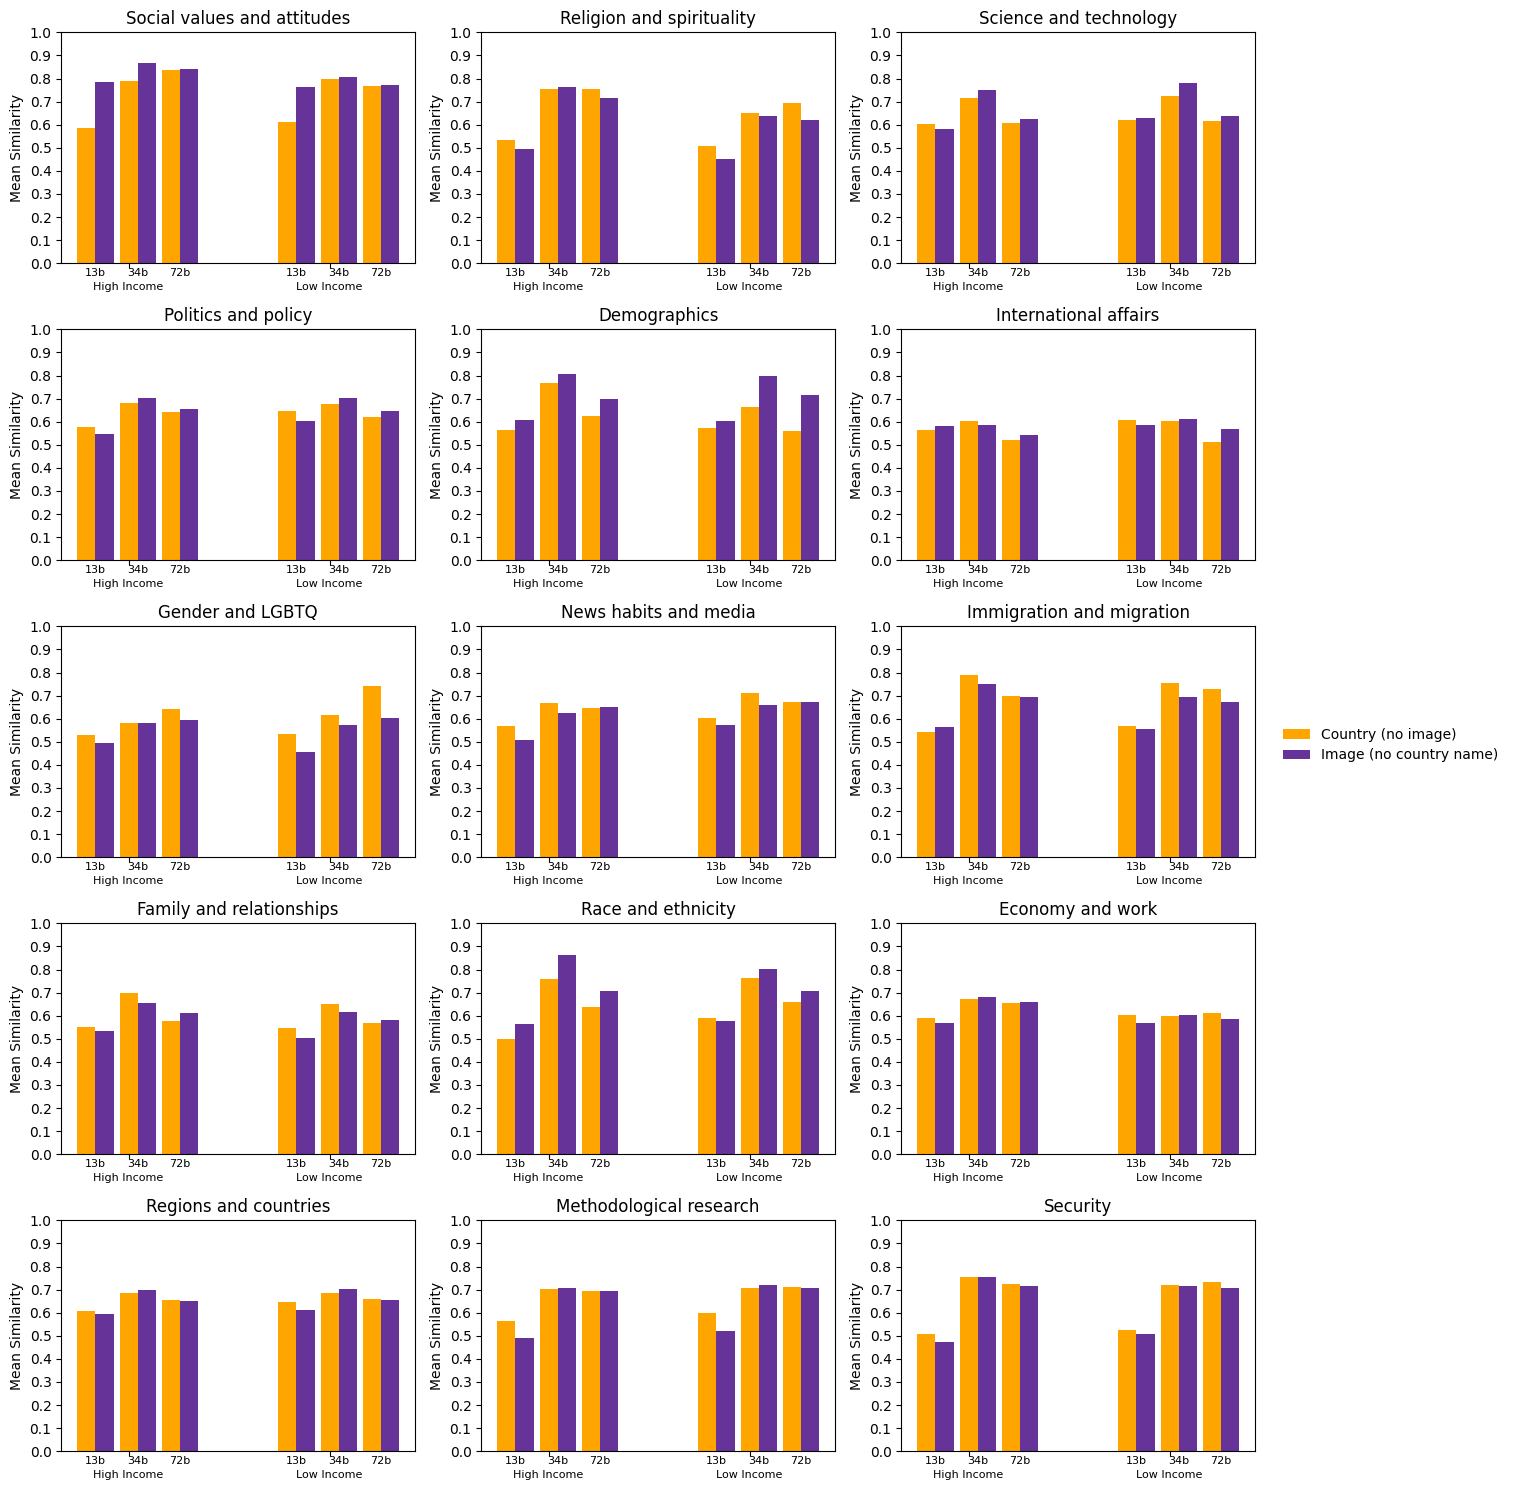

In [24]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory

# Define income groups
rich_countries = ["United States", "Brazil", "China"]
poor_countries = ["Pakistan", "Nigeria", "Bangladesh"]

# Create mapping from country to income group
country_income_group = {country: 'High Income' for country in rich_countries}
country_income_group.update({country: 'Low Income' for country in poor_countries})

# Directory to save individual figures
individual_figures_dir = 'plots/individual_topic_figures_income_groups'
if os.path.exists(individual_figures_dir):
    shutil.rmtree(individual_figures_dir)
    print(f"Existed! Deleted {individual_figures_dir} directory")
os.makedirs(individual_figures_dir, exist_ok=True)

# List of unique question topics
question_topics = sorted(all_data_df['question_topic'].unique())

# List of unique models
models = sorted(all_data_df['model_size'].unique())

# Prepare for plotting
n_cols = 3  # Number of subplots per row
n_rows = int(np.ceil(len(question_topics) / n_cols))

fig_width = 5 * n_cols
fig_height = 3 * n_rows
fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
axs = axs.flatten()  # Flatten the array of axes

# Loop through each topic to create subplots
for idx, topic in enumerate(question_topics):
    df_category = all_data_df[all_data_df['question_topic'] == topic].copy()
    
    # Map 'country' to 'IncomeGroup'
    df_category['IncomeGroup'] = df_category['country'].map(country_income_group)
    
    # Remove rows with missing IncomeGroup
    df_category = df_category.dropna(subset=['IncomeGroup'])
    
    # Convert 'Image' column to boolean
    df_category['Image'] = df_category['Image'].map({'False': False, 'True': True})
    
    # Calculate mean similarity per IncomeGroup, Image scenario, and model_size
    df_mean = df_category.groupby(['IncomeGroup', 'Image', 'model_size'])['question_topic_country_mean_similarity'].mean().reset_index()

    # Pivot the data to have Image scenarios as columns
    df_pivot = df_mean.pivot_table(index=['IncomeGroup', 'model_size'], columns='Image', values='question_topic_country_mean_similarity').reset_index()
    
    # Rename columns
    df_pivot = df_pivot.rename(columns={False: 'Text Similarity', True: 'Image Similarity'})
    
    # Ensure both 'Text Similarity' and 'Image Similarity' columns exist
    for col in ['Text Similarity', 'Image Similarity']:
        if col not in df_pivot.columns:
            df_pivot[col] = np.nan
    
    # Drop IncomeGroups that have missing data in either scenario
    df_pivot = df_pivot.dropna()
    
    # Sort IncomeGroups in the order High Income -> Low Income
    income_group_order = ['High Income', 'Low Income']
    df_pivot['IncomeGroup'] = pd.Categorical(df_pivot['IncomeGroup'], categories=income_group_order, ordered=True)
    df_pivot = df_pivot.sort_values('IncomeGroup')

    # Data for plotting
    income_groups = df_pivot['IncomeGroup'].unique()
    x = np.arange(len(income_groups))  # Label locations
    width = 0.09  # Width of the bars for each model
    gap_between_models = 0.12  # Small gap between models

    ax = axs[idx]

    # Initialize flags for legend
    has_plotted_text = False
    has_plotted_image = False

    # Number of models
    n_models = len(models)

    # Compute total group width to center bars
    group_width = n_models * width + (n_models - 1) * gap_between_models
    start_offset = -group_width / 2 + width / 2

    # Loop through models and plot for each
    for model_idx, model in enumerate(models):
        df_model = df_pivot[df_pivot['model_size'] == model].copy()
        
        # Offset to center bars properly
        offset = start_offset + model_idx * (width + gap_between_models)
        
        # Plot Text Similarity and Image Similarity bars for each model
        if not has_plotted_text:
            ax.bar(x + offset, df_model['Text Similarity'], width, label='Country (no image)', color='orange')
            has_plotted_text = True
        else:
            ax.bar(x + offset, df_model['Text Similarity'], width, color='orange')
        
        if not has_plotted_image:
            ax.bar(x + offset + width, df_model['Image Similarity'], width, label='Image (no country name)', color='rebeccapurple')
            has_plotted_image = True
        else:
            ax.bar(x + offset + width, df_model['Image Similarity'], width, color='rebeccapurple')
            
        # Add model name annotation below the bars
        for i in range(len(x)):
            center_position = x[i] + offset + width / 2
            ax.text(center_position, -0.02, model, ha='center', va='top', fontsize=8, color='black', transform=ax.get_xaxis_transform())

    # Set x-ticks to be at the center of the groups of bars
    ax.set_xticks(x)
    ax.set_xticklabels(income_groups, rotation=0)
    ax.tick_params(axis='x', which='major', labelsize=8, pad=10)
    ax.set_ylim([0, 1])  # Set y-axis limits to [0, 1]
    ax.yaxis.set_ticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks with steps of 0.1

    # Set labels and title
    ax.set_ylabel('Mean Similarity')
    topic_title = topic.split('.', 1)[-1].strip()
    ax.set_title(f'{topic_title}')

    # Save individual plot
    individual_plot_path = f'{individual_figures_dir}/{topic_title}.png'
    fig_individual, ax_individual = plt.subplots(figsize=(5, 3))
    df_pivot.plot(kind='bar', x='IncomeGroup', y=['Text Similarity', 'Image Similarity'], ax=ax_individual, color=['orange', 'rebeccapurple'])
    ax_individual.set_ylabel('Mean Similarity')
    ax_individual.set_title(f'{topic_title}')
    ax_individual.set_ylim([0, 1])
    ax_individual.yaxis.set_ticks(np.arange(0, 1.1, 0.1))
    ax_individual.legend(['Country (no image)', 'Image (no country name)'])
    plt.tight_layout()
    fig_individual.savefig(individual_plot_path, bbox_inches='tight')
    plt.close(fig_individual)

# Retrieve handles and labels from one of the axes
handles, labels = ax.get_legend_handles_labels()

# Adjust layout to make room for the legend on the right
plt.tight_layout(rect=[0, 0, 0.85, 1.0])  # Adjust to leave space for the legend on the right

# Add a single legend for the entire figure, positioned to the right of all subplots
fig.legend(handles=handles, labels=labels, loc='center left', bbox_to_anchor=(0.85, 0.5), frameon=False)

# Save and show the final figure
fig.savefig(f'{individual_figures_dir}/final_similarity_plot_income_groups.png', bbox_inches='tight')
plt.show()


### Plot Similarity Score for each economic strate 
- This is individual plot for each topic
- This is per low income, middle income and high income
- Note that all images are for people of same demographic group

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import blended_transform_factory

# Directory to save individual figures
individual_figures_dir = 'plots/individual_topic_figures_income_groups'
if os.path.exists(individual_figures_dir):
    shutil.rmtree(individual_figures_dir)
    print(f"Existed! Deleted {individual_figures_dir} directory")
os.makedirs(individual_figures_dir, exist_ok=True)

# List of unique question topics
question_topics = sorted(all_data_df['question_topic'].unique())

# List of unique models
models = sorted(all_data_df['model_size'].unique())

# Loop through each topic to create individual plots
for idx, topic in enumerate(question_topics):
    df_category = all_data_df[all_data_df['question_topic'] == topic].copy()

    # Map 'country' to 'IncomeGroup'
    df_category['IncomeGroup'] = df_category['country'].map(country_income_group)

    # Remove rows with missing IncomeGroup
    df_category = df_category.dropna(subset=['IncomeGroup'])

    # Convert 'Image' column to boolean
    df_category['Image'] = df_category['Image'].map({'False': False, 'True': True})

    # Calculate mean 'question_topic_mean_similarity' per IncomeGroup, Image scenario, and model_size
    df_mean = df_category.groupby(['IncomeGroup', 'Image', 'model_size'])['question_topic_country_mean_similarity'].mean().reset_index()

    # Pivot the data to have Image scenarios as columns
    df_pivot = df_mean.pivot_table(index=['IncomeGroup', 'model_size'], columns='Image', values='question_topic_country_mean_similarity').reset_index()

    # Rename columns
    df_pivot.rename(columns={False: 'Text Similarity', True: 'Image Similarity'}, inplace=True)

    # Ensure both 'Text Similarity' and 'Image Similarity' columns exist
    for col in ['Text Similarity', 'Image Similarity']:
        if col not in df_pivot.columns:
            df_pivot[col] = np.nan

    # Drop IncomeGroups that have missing data in either scenario
    df_pivot = df_pivot.dropna()

    # Sort IncomeGroups in the order High Income -> Low Income
    income_group_order = ['High Income', 'Low Income']
    df_pivot['IncomeGroup'] = pd.Categorical(df_pivot['IncomeGroup'], categories=income_group_order, ordered=True)
    df_pivot = df_pivot.sort_values('IncomeGroup')

    # Data for plotting
    income_groups = df_pivot['IncomeGroup'].unique()
    x = np.arange(len(income_groups))  # Label locations
    width = 0.09  # Width of the bars for each model
    gap_between_models = 0.11  # Small gap between models

    # Create individual figure for the topic
    fig_individual, ax_individual = plt.subplots(figsize=(5, 3))

    # Initialize flags for legend
    has_plotted_text = False
    has_plotted_image = False

    # Number of models
    n_models = len(models)

    # Compute total group width to center bars
    group_width = n_models * width + (n_models - 1) * gap_between_models
    start_offset = -group_width / 2 + width / 2

    # Loop through models and plot for each
    for model_idx, model in enumerate(models):
        df_model = df_pivot[df_pivot['model_size'] == model].copy()

        # Offset to center bars properly
        offset = start_offset + model_idx * (width + gap_between_models)

        # Plot Text Similarity bars for each model
        if not has_plotted_text:
            ax_individual.bar(x + offset, df_model['Text Similarity'], width, label='Country (no image)', color='orange')
            has_plotted_text = True
        else:
            ax_individual.bar(x + offset, df_model['Text Similarity'], width, color='orange')

        # Plot Image Similarity bars for each model
        if not has_plotted_image:
            ax_individual.bar(x + offset + width, df_model['Image Similarity'], width, label='Image (no country name)', color='rebeccapurple')
            has_plotted_image = True
        else:
            ax_individual.bar(x + offset + width, df_model['Image Similarity'], width, color='rebeccapurple')

        # Add model name annotation below the bars
        for i in range(len(x)):
            center_position = x[i] + offset + width / 2
            ax_individual.text(
                center_position, -0.02,
                model, ha='center', va='top',
                fontsize=8, color='black',
                transform=ax_individual.get_xaxis_transform()
            )

    # Set x-ticks to be at the center of the groups of bars
    ax_individual.set_xticks(x)
    ax_individual.set_xticklabels(income_groups, rotation=0)
    ax_individual.tick_params(axis='x', which='major', labelsize=8, pad=10)
    ax_individual.set_ylim([0, 1])  # Set y-axis limits to [0, 1]
    ax_individual.yaxis.set_ticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks with steps of 0.1

    # Set labels and title
    ax_individual.set_ylabel('Mean Similarity')
    ax_individual.set_title(f'{topic.split(".", 1)[-1].strip()}', fontsize=8)

    # Retrieve handles and labels from one of the axes
    handles, labels = ax_individual.get_legend_handles_labels()

    # Add legend to the individual figure
    fig_individual.legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(0.8, 0.9), frameon=True, fontsize=8)

    # Adjust layout for the individual plot
    fig_individual.tight_layout(rect=[0, 0, 0.85, 1.0])  # Adjust to leave space for the legend on the right

    # Save each individual figure
    fig_individual.savefig(os.path.join(individual_figures_dir, f'{topic}_income.png'), bbox_inches='tight')
    print(f"Saved {topic}_income.png")

    # Close the individual figure to free memory
    plt.close(fig_individual)

Existed! Deleted plots/individual_topic_figures_income_groups directory
Saved A. Social values and attitudes_income.png
Saved B. Religion and spirituality_income.png
Saved C. Science and technology_income.png
Saved D. Politics and policy_income.png
Saved E. Demographics_income.png
Saved G. International affairs_income.png
Saved I. Gender and LGBTQ_income.png
Saved J. News habits and media_income.png
Saved K. Immigration and migration_income.png
Saved L. Family and relationships_income.png
Saved M. Race and ethnicity_income.png
Saved N. Economy and work_income.png
Saved O. Regions and countries_income.png
Saved P. Methodological research_income.png
Saved Q. Security_income.png


### Computer % change in similarity and JSD values for each question topic per income strata

In [19]:
# Initialize a list to store the results
results = []

# Loop through each question topic
for topic in question_topics:
    df_category = all_data_df[all_data_df['question_topic'] == topic]
    
    # Map 'country' to 'IncomeGroup'
    df_category['IncomeGroup'] = df_category['country'].map(country_income_group)
    # breakpoint()
    # Remove rows with missing IncomeGroup
    df_category = df_category.dropna(subset=['IncomeGroup'])
    
    # Convert 'Image' column to boolean if not already
    if df_category['Image'].dtype == object:
        df_category['Image'] = df_category['Image'].map({'False': False, 'True': True})
    
    # Loop through each model
    for model in df_category['model_size'].unique():
        df_model = df_category[df_category['model_size'] == model]
        
        # For each income group
        for income_group in ['High Income', 'Low Income']:
            df_group = df_model[df_model['IncomeGroup'] == income_group]
            
            # Mean 'Text Similarity' (Image == False)
            text_similarity_mean = df_group[df_group['Image'] == False]['question_topic_country_mean_similarity'].mean()
            
            # Mean 'Image Similarity' (Image == True)
            image_similarity_mean = df_group[df_group['Image'] == True]['question_topic_country_mean_similarity'].mean()
            
            # Compute percentage change from 'Text Similarity' to 'Image Similarity'
            if text_similarity_mean != 0 and not pd.isnull(text_similarity_mean):
                percentage_change = ((image_similarity_mean - text_similarity_mean) / text_similarity_mean) * 100
            else:
                percentage_change = None  # or np.nan
            
            # Store the result
            results.append({
                'Topic': topic,
                'Model Size': model,  # Add the model size to the results
                'IncomeGroup': income_group,
                'Text Similarity IG Mean': text_similarity_mean,
                'Image Similarity IG Mean': image_similarity_mean,
                'Percentage Change': percentage_change
            })

# Convert results to DataFrame
df_variance_income_groups = pd.DataFrame(results)

# Show the first few rows
df_variance_income_groups.head(10)


,Topic,Model Size,IncomeGroup,Text Similarity IG Mean,Image Similarity IG Mean,Percentage Change
0,A. Social values and attitudes,13b,High Income,0.586844,0.783580,33.524334
1,A. Social values and attitudes,13b,Low Income,0.610500,0.764901,25.290932
2,A. Social values and attitudes,34b,High Income,0.790638,0.868108,9.798389
3,A. Social values and attitudes,34b,Low Income,0.799520,0.805693,0.772085
4,A. Social values and attitudes,72b,High Income,0.838635,0.841798,0.377200
5,A. Social values and attitudes,72b,Low Income,0.766963,0.771123,0.542349
6,B. Religion and spirituality,13b,High Income,0.535701,0.495009,-7.596107
7,B. Religion and spirituality,13b,Low Income,0.507300,0.453385,-10.627727
8,B. Religion and spirituality,34b,High Income,0.756249,0.763421,0.948449
9,B. Religion and spirituality,34b,Low Income,0.652480,0.639655,-1.965595


In [20]:
# Pivot the DataFrame to have topics as columns and similarity and percentage change as rows, including model size
df_pivot_topicwise = df_variance_income_groups.pivot_table(index=['IncomeGroup', 'Model Size'], columns='Topic', values=['Text Similarity IG Mean', 'Image Similarity IG Mean', 'Percentage Change'])

# Flatten the MultiIndex columns
df_pivot_topicwise.columns = ['_'.join(col).strip() for col in df_pivot_topicwise.columns.values]

# Display the updated DataFrame with only % change columns
df_pivot_topicwise = df_pivot_topicwise.filter(like='Percentage Change', axis=1)
df_pivot_topicwise = df_pivot_topicwise.reindex(['High Income', 'Low Income'], level=0)
df_pivot_topicwise = df_pivot_topicwise.round(2)
df_pivot_topicwise

Percentage Change_A. Social values and attitudes  \
IncomeGroup Model Size                                                     
High Income 13b                                                    33.52   
            34b                                                     9.80   
            72b                                                     0.38   
Low Income  13b                                                    25.29   
            34b                                                     0.77   
            72b                                                     0.54   

                        Percentage Change_B. Religion and spirituality  \
IncomeGroup Model Size                                                   
High Income 13b                                                  -7.60   
            34b                                                   0.95   
            72b                                                  -5.44   
Low Income  13b                                                 -10.63   
            34b                                                  -1.97   
            72b                                                 -10.78   

                        Percentage Change_C. Science and technology  \
IncomeGroup Model Size                                                
High Income 13b                                               -3.15   
            34b                                                4.98   
            72b                                                3.09   
Low Income  13b                                                0.88   
            34b                                                7.72   
            72b                                                3.93   

                        Percentage Change_D. Politics and policy  \
IncomeGroup Model Size                                             
High Income 13b                                            -5.22   
            34b                                             3.53   
            72b                                             1.76   
Low Income  13b                                            -6.56   
            34b                                             3.56   
            72b                                             4.73   

                        Percentage Change_E. Demographics  \
IncomeGroup Model Size                                      
High Income 13b                                      7.98   
            34b                                      5.57   
            72b                                     11.80   
Low Income  13b                                      5.42   
            34b                                     20.21   
            72b                                     27.62   

                        Percentage Change_G. International affairs  \
IncomeGroup Model Size                                               
High Income 13b                                               3.39   
            34b                                              -2.91   
            72b                                               4.68   
Low Income  13b                                              -3.59   
            34b                                               1.85   
            72b                                              10.65   

                        Percentage Change_I. Gender and LGBTQ  \
IncomeGroup Model Size                                          
High Income 13b                                         -6.45   
            34b                                          0.01   
            72b                                         -7.04   
Low Income  13b                                        -14.77   
            34b                                         -7.05   
            72b                                        -18.88   

                        Percentage Change_J. News habits and media  \
IncomeGroup Model Size                                             

In [21]:
# Calculate the mean
df_pivot_topicwise['Mean Percentage Change'] = df_pivot_topicwise.mean(axis=1)
# df_pivot_topicwise.loc['Total Mean'] = df_pivot_topicwise.mean()

# Display the updated DataFrame
df_pivot_topicwise

Percentage Change_A. Social values and attitudes  \
IncomeGroup Model Size                                                     
High Income 13b                                                    33.52   
            34b                                                     9.80   
            72b                                                     0.38   
Low Income  13b                                                    25.29   
            34b                                                     0.77   
            72b                                                     0.54   

                        Percentage Change_B. Religion and spirituality  \
IncomeGroup Model Size                                                   
High Income 13b                                                  -7.60   
            34b                                                   0.95   
            72b                                                  -5.44   
Low Income  13b                                                 -10.63   
            34b                                                  -1.97   
            72b                                                 -10.78   

                        Percentage Change_C. Science and technology  \
IncomeGroup Model Size                                                
High Income 13b                                               -3.15   
            34b                                                4.98   
            72b                                                3.09   
Low Income  13b                                                0.88   
            34b                                                7.72   
            72b                                                3.93   

                        Percentage Change_D. Politics and policy  \
IncomeGroup Model Size                                             
High Income 13b                                            -5.22   
            34b                                             3.53   
            72b                                             1.76   
Low Income  13b                                            -6.56   
            34b                                             3.56   
            72b                                             4.73   

                        Percentage Change_E. Demographics  \
IncomeGroup Model Size                                      
High Income 13b                                      7.98   
            34b                                      5.57   
            72b                                     11.80   
Low Income  13b                                      5.42   
            34b                                     20.21   
            72b                                     27.62   

                        Percentage Change_G. International affairs  \
IncomeGroup Model Size                                               
High Income 13b                                               3.39   
            34b                                              -2.91   
            72b                                               4.68   
Low Income  13b                                              -3.59   
            34b                                               1.85   
            72b                                              10.65   

                        Percentage Change_I. Gender and LGBTQ  \
IncomeGroup Model Size                                          
High Income 13b                                         -6.45   
            34b                                          0.01   
            72b                                         -7.04   
Low Income  13b                                        -14.77   
            34b                                         -7.05   
            72b                                        -18.88   

                        Percentage Change_J. News habits and media  \
IncomeGroup Model Size                                             